In [131]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,6)
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas_datareader import data
from datetime import datetime
from __future__ import division
    

In [132]:
tech_list = ['AAPL','GOOG','MSFT','AMZN','BTC']

In [133]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [91]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end) 
    # by using globals()[stock], it sets the stock to a global variable and makes it the dataframe 

In [92]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,129.659286,126.618948,128.214971,128.162321,1.077001e+08,127.712351
std,10.262030,10.567090,10.356025,10.497718,4.400903e+07,10.638958
min,110.190002,103.099998,104.540001,106.839996,4.639770e+07,106.157211
25%,122.042498,118.949999,120.475000,120.679998,7.793078e+07,120.136076
50%,128.250000,125.940002,127.081249,127.000000,9.678535e+07,126.685192
75%,135.485001,133.294998,134.537498,134.214996,1.232561e+08,133.807575
max,151.679993,149.149994,150.229996,151.119995,3.326072e+08,151.119995


In [93]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-08-25 to 2021-08-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

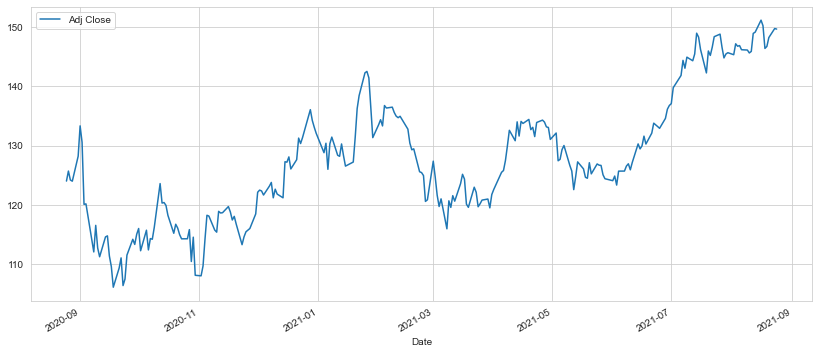

In [94]:
AAPL['Adj Close'].plot(legend=True, figsize=(14,6))

<AxesSubplot:xlabel='Date'>

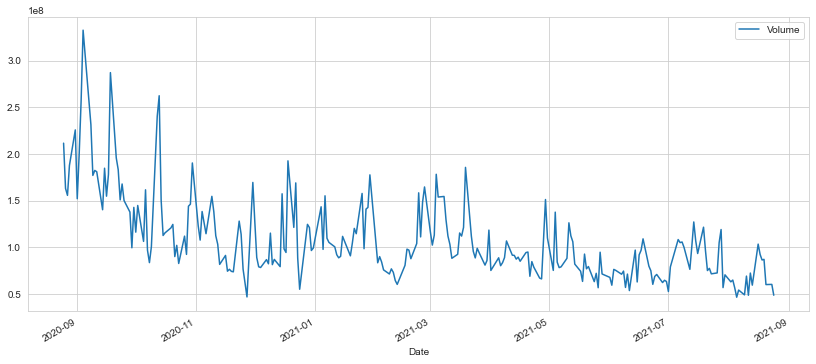

In [95]:
AAPL['Volume'].plot(legend=True,figsize=(14,6))

In [96]:
# get the moving averages for 10,20 and 50 days
ma_day = [10,20,50]

for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

<AxesSubplot:xlabel='Date'>

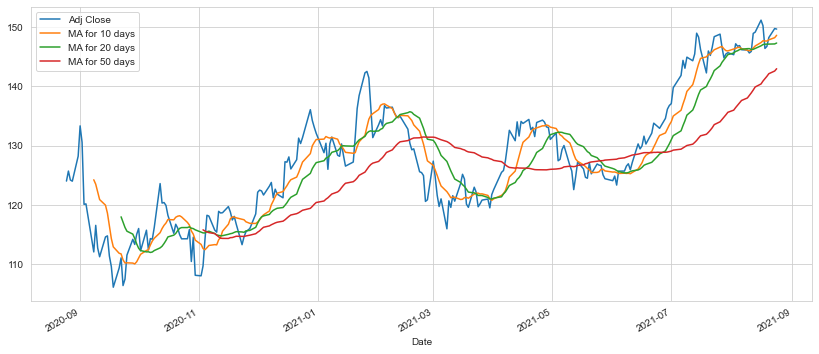

In [97]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(14,6) )

<AxesSubplot:xlabel='Date'>

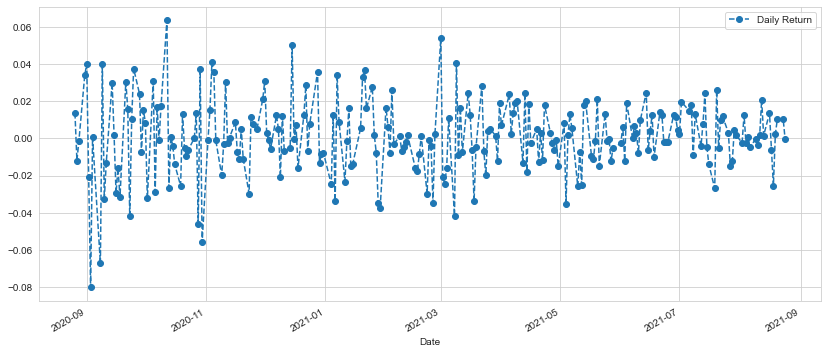

In [98]:
# Apple stock daily return - movement as %
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(14,6),legend=True,linestyle= '--',marker='o')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

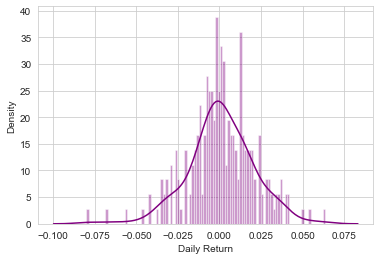

In [99]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

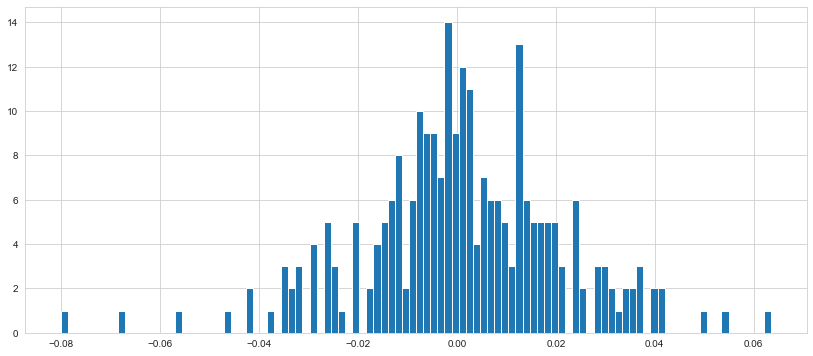

In [100]:
AAPL['Daily Return'].hist(bins=100,figsize=(14,6))

In [101]:
closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [102]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN,BTC
Date,,,,,
2020-08-25,124.027283,1608.219971,214.501740,3346.489990,NaN
2020-08-26,125.713928,1652.380005,219.139160,3441.850098,NaN
2020-08-27,124.211098,1634.329956,224.519806,3400.000000,NaN
2020-08-28,124.009895,1644.410034,226.828613,3401.800049,NaN
2020-08-31,128.215347,1634.180054,223.479355,3450.959961,NaN


In [103]:
tech_rets = closing_df.pct_change()

In [104]:
tech_rets.head().dropna()

Symbols,AAPL,GOOG,MSFT,AMZN,BTC
Date,,,,,


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


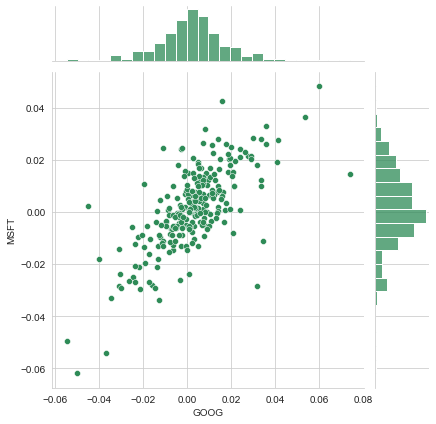

In [105]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')
# https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [106]:
from IPython.display import SVG
SVG(url='https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#/media/File:Correlation_examples2.svg')

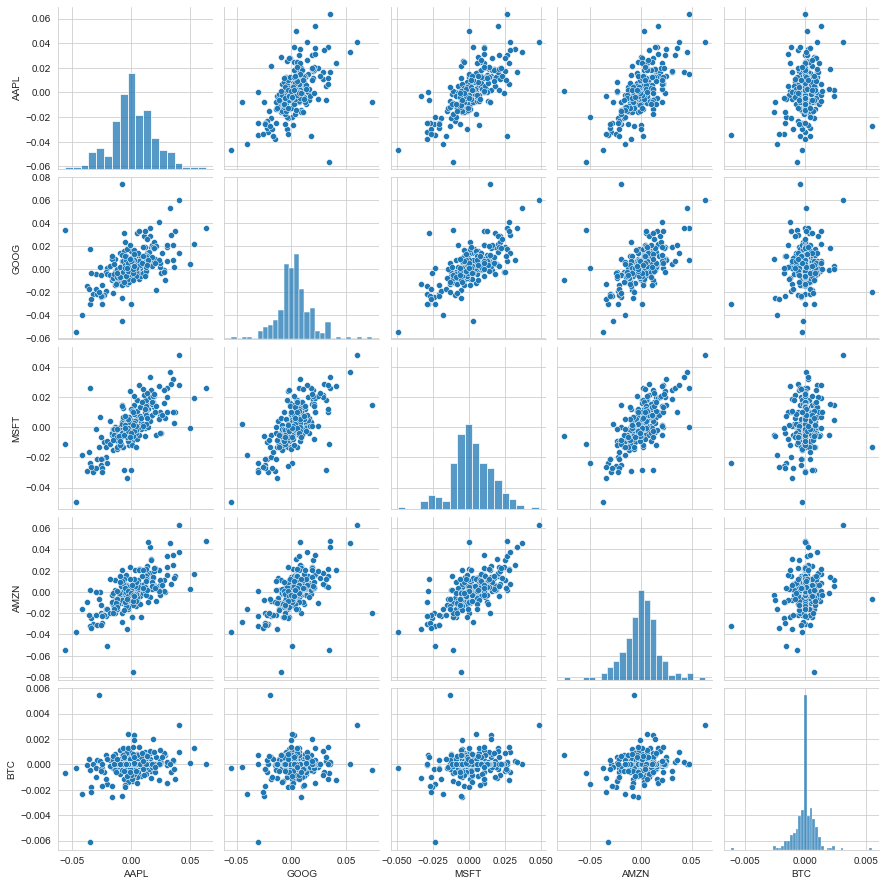

In [107]:
sns.pairplot(tech_rets.dropna())

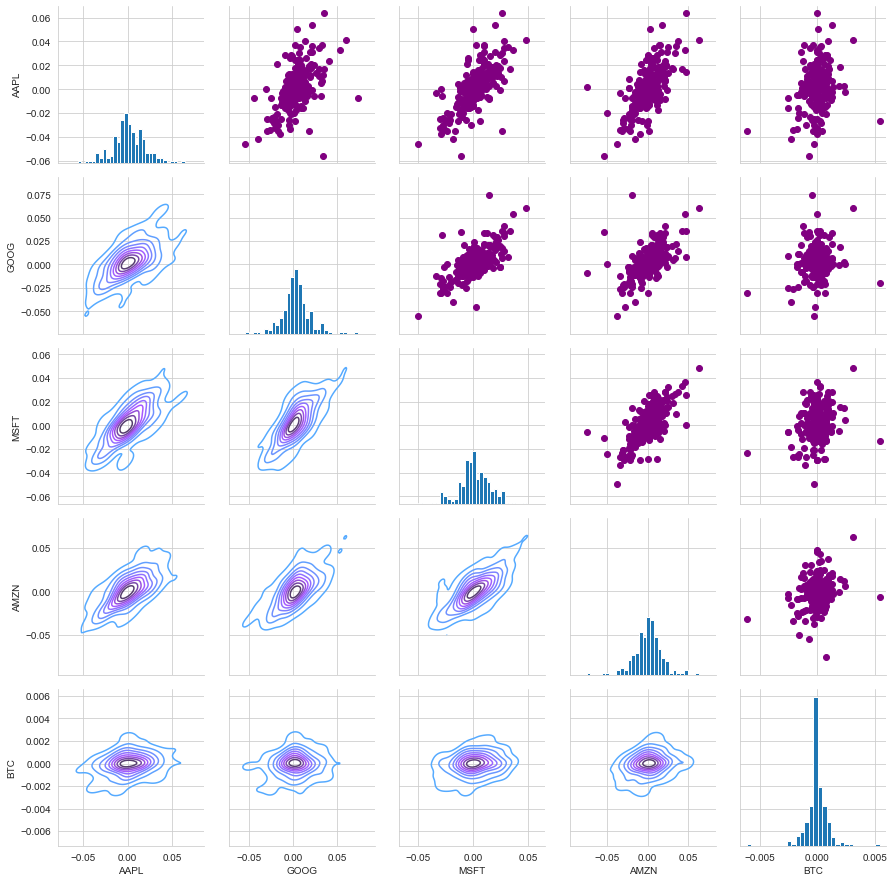

In [108]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

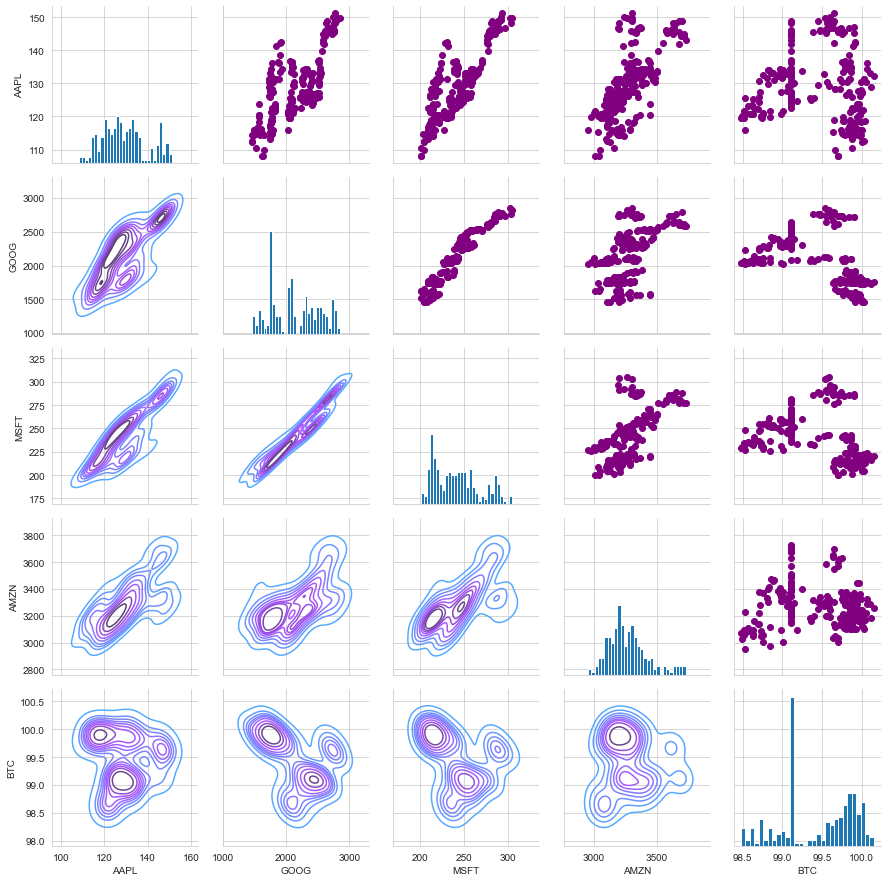

In [109]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

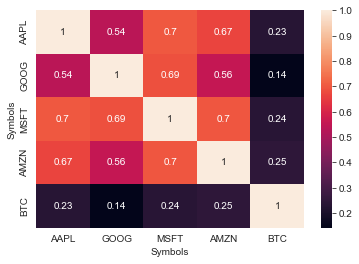

In [110]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

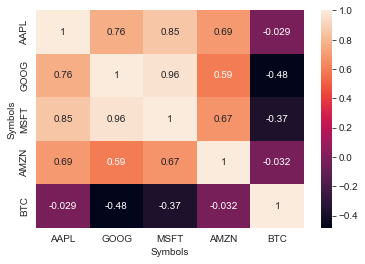

In [111]:
sns.heatmap(closing_df.dropna().corr(),annot=True)

In [112]:
# Risk

In [113]:
rets = tech_rets.dropna()

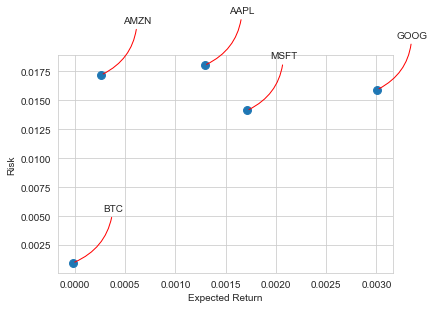

In [114]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
    xy = (x,y),xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va= 'bottom',
    arrowprops = dict(arrowstyle='-',color='red',connectionstyle='arc3,rad=-0.3'))

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

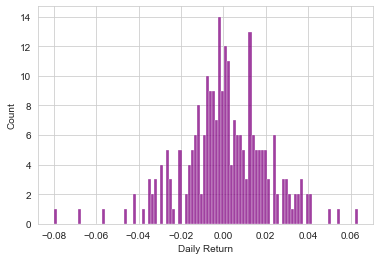

In [115]:
sns.histplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [116]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,BTC
Date,,,,,
2020-10-02,-0.032280,-0.021254,-0.029511,-0.029883,0.000000
2020-10-05,0.030791,0.018925,0.020321,0.023744,-0.000050
2020-10-06,-0.028669,-0.021924,-0.021247,-0.031020,0.000350
2020-10-07,0.016967,0.004713,0.019038,0.030881,-0.001100
2020-10-08,-0.000956,0.017558,0.003574,-0.001608,0.000751


In [150]:
rets['AAPL'].quantile(0.05) # this value at risk.
# here, Apple investment of $1,000,000 would lose a maximum of 2.95% per day (95% confidence) or $29,500 at worst.

-0.029527995517467518

In [151]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG'] # mu associated for drift
sigma = rets.std()['GOOG']

In [157]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return price

                          
"""    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu, scale=sigma)
        drift[x] = 0
        price[x] = price[x-1]+(price[x-1]*(drift[x] + shock[x]))
    return price

shock[x] = np.random.normal(loc=0, scale=sigma)
    drift[x] = mu
 
or
 
    shock[x] = np.random.normal(loc=mu, scale=sigma)
    drift[x] = 0"""

In [158]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-25,1611.619995,1582.069946,1582.069946,1608.219971,2247100,1608.219971
2020-08-26,1659.219971,1603.599976,1608.000000,1652.380005,3993400,1652.380005
2020-08-27,1655.000000,1625.750000,1653.680054,1634.329956,1861600,1634.329956
2020-08-28,1647.170044,1630.750000,1633.489990,1644.410034,1499000,1644.410034
2020-08-31,1647.964966,1630.310059,1647.890015,1634.180054,1823400,1634.180054


In [159]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

Text(0.5, 1.0, 'Monte Carlo Analysis for GOOGLE')

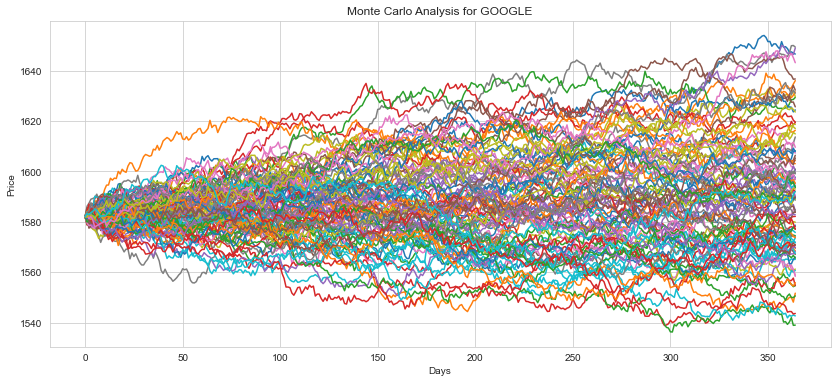

In [160]:

start_price = 1582.07

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for GOOGLE')


In [161]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google stock after 365 days')

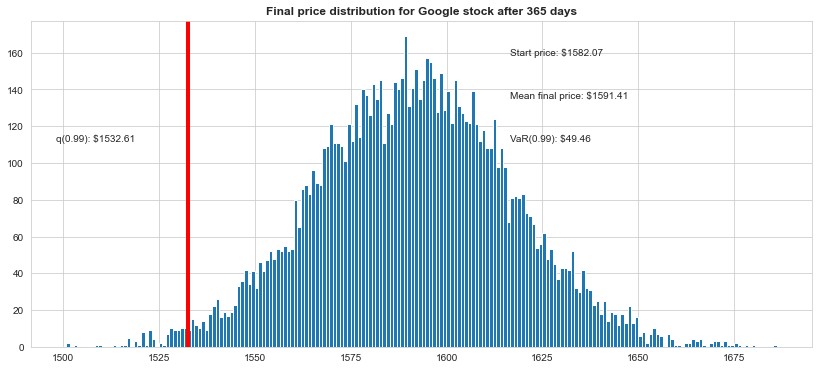

In [162]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)
# starting price
plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)
# mean ending price
plt.figtext(0.6,0.7, "Mean final price: $%.2f" % simulations.mean())
# variance of the price (within 99& confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" % (start_price - q))
# display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)
# plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')
# title
plt.title(u"Final price distribution for Google stock after %s days" % days, weight='bold')